In [101]:
import numpy as np
import pandas as pd

In [102]:
df = pd.read_csv('FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [103]:
new_df = df[['ENGINESIZE','FUELCONSUMPTION_COMB_MPG','CO2EMISSIONS']]
new_df.head()

,ENGINESIZE,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,33,196
1,2.4,29,221
2,1.5,48,136
3,3.5,25,255
4,3.5,27,244


In [104]:
print('the shape of our new df is :',new_df.shape)
print(new_df.columns)

the shape of our new df is : (1067, 3)
Index(['ENGINESIZE', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'], dtype='object')


My "X" wil be 'ENGINESIZE', 'FUELCONSUMPTION_COMB_MPG'

In [105]:
X = new_df[['ENGINESIZE', 'FUELCONSUMPTION_COMB_MPG']]
Y = new_df[['CO2EMISSIONS']]

In [106]:
from sklearn.model_selection import train_test_split as ttp 

train_X , test_X , train_Y , test_Y = ttp(X,Y,test_size=0.2,train_size=0.8,random_state=4)

In [107]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(train_X,train_Y)


LinearRegression()

In [108]:
from sklearn.metrics import r2_score

y_pred = reg.predict(test_X)
print(r2_score(test_Y,y_pred))

0.9010467908863194


In [109]:
print('the coefs are : ',reg.coef_)
print('the intercepts are : ',reg.intercept_)

the coefs are :  [[18.02953164 -4.9159749 ]]
the intercepts are :  [325.87008343]


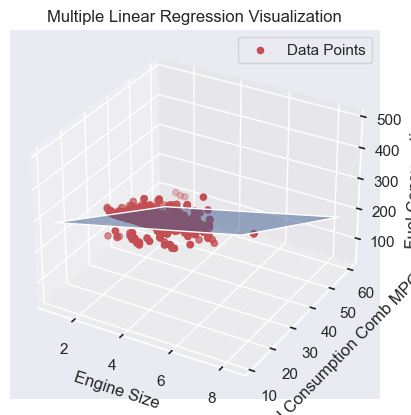

In [110]:
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

X1 = np.array([X['ENGINESIZE']])  
X2 = np.array([X['FUELCONSUMPTION_COMB_MPG']])  
Y = np.array([Y])

coef_1 = 18.02953164
coef_2 = -4.9159749
intercept = 325.87008343

x1_range = np.linspace(X1.min(), X1.max(), 10)  
x2_range = np.linspace(X2.min(), X2.max(), 10)  
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)  

Z = intercept + coef_1 * x1_mesh + coef_2 * x2_mesh  

fig = plt.figure()  
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X1, X2, Y, color='r', label='Data Points') 

ax.plot_surface(x1_mesh, x2_mesh, Z, alpha=0.5, color='b', rstride=100, cstride=100) 

ax.set_xlabel('Engine Size')  
ax.set_ylabel('Fuel Consumption Comb MPG')  
ax.set_zlabel('Fuel Consumption')  
ax.set_title('Multiple Linear Regression Visualization')  
ax.legend()  

plt.show()  
